<a href="https://colab.research.google.com/github/li199959/one/blob/main/%E6%97%A5%E5%BF%97%E7%BB%98%E5%9B%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the data
file1_path = '/content/metrics.csv'
file2_path = '/content/training_metrics_detailed (3).csv'
metrics_df = pd.read_csv(file1_path)
training_metrics_detailed_df = pd.read_csv(file2_path)

# 2. Function to plot metrics without "vs. Epoch-Batches" in titles
def plot_metrics_without_vs(df, title_prefix=""):
    # Set up the figure and axes
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(title_prefix + " Training Metrics", fontsize=16)

    # Create an epoch-batch label for x-axis
    epoch_batch = [f"{epoch}-{batch}" for epoch, batch in zip(df['Epoch'], df['Batch'])]

    # Plot Training Loss
    axs[0, 0].plot(epoch_batch, df['Train Loss'], label='Train Loss', color='blue')
    axs[0, 0].set_title('Training Loss')
    axs[0, 0].set_xlabel('Epoch-Batches')
    axs[0, 0].set_ylabel('Training Loss')
    axs[0, 0].legend()

    # Plot Validation Loss
    axs[0, 1].plot(epoch_batch, df['Validation Loss'], label='Validation Loss', color='red')
    axs[0, 1].set_title('Validation Loss')
    axs[0, 1].set_xlabel('Epoch-Batches')
    axs[0, 1].set_ylabel('Validation Loss')
    axs[0, 1].legend()

    # Plot Validation F1 Score
    axs[1, 0].plot(epoch_batch, df['Validation F1 Score'], label='Validation F1 Score', color='green')
    axs[1, 0].set_title('Validation F1 Score')
    axs[1, 0].set_xlabel('Epoch-Batches')
    axs[1, 0].set_ylabel('Validation F1 Score')
    axs[1, 0].legend()

    # Plot Learning Rate
    axs[1, 1].plot(epoch_batch, df['Learning Rate'], label='Learning Rate', color='purple')
    axs[1, 1].set_title('Learning Rate')
    axs[1, 1].set_xlabel('Epoch-Batches')
    axs[1, 1].set_ylabel('Learning Rate')
    axs[1, 1].legend()

    # Adjust layout and x-axis ticks for better visualization
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    for ax in axs.ravel():
        ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=10, prune='both'))  # Limit number of x-axis ticks

    plt.show()




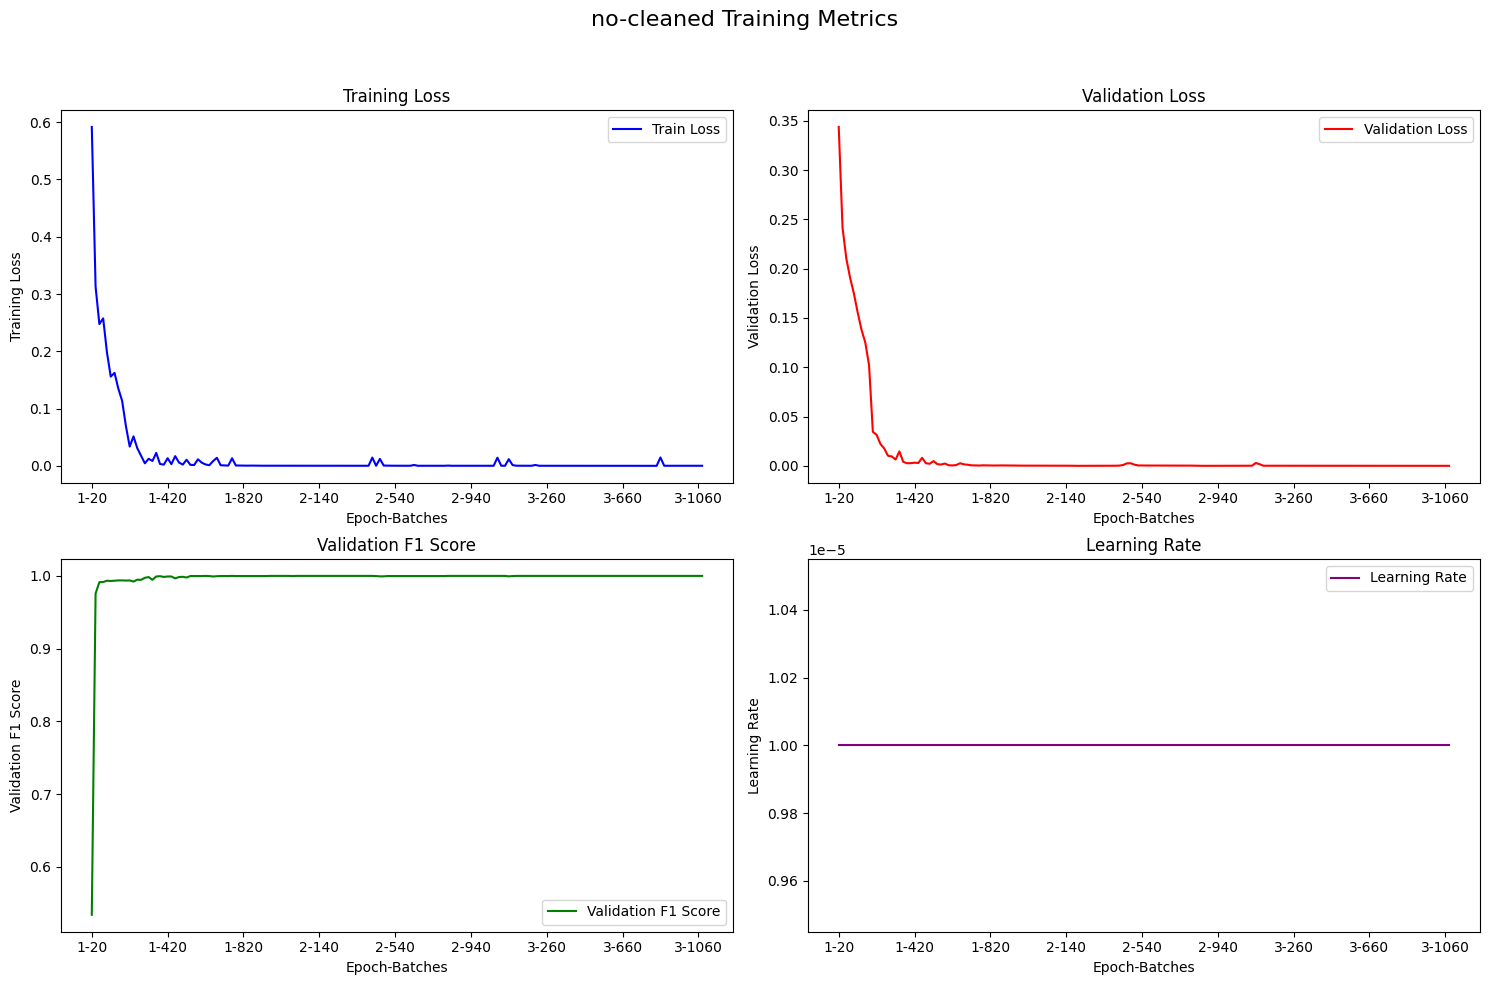

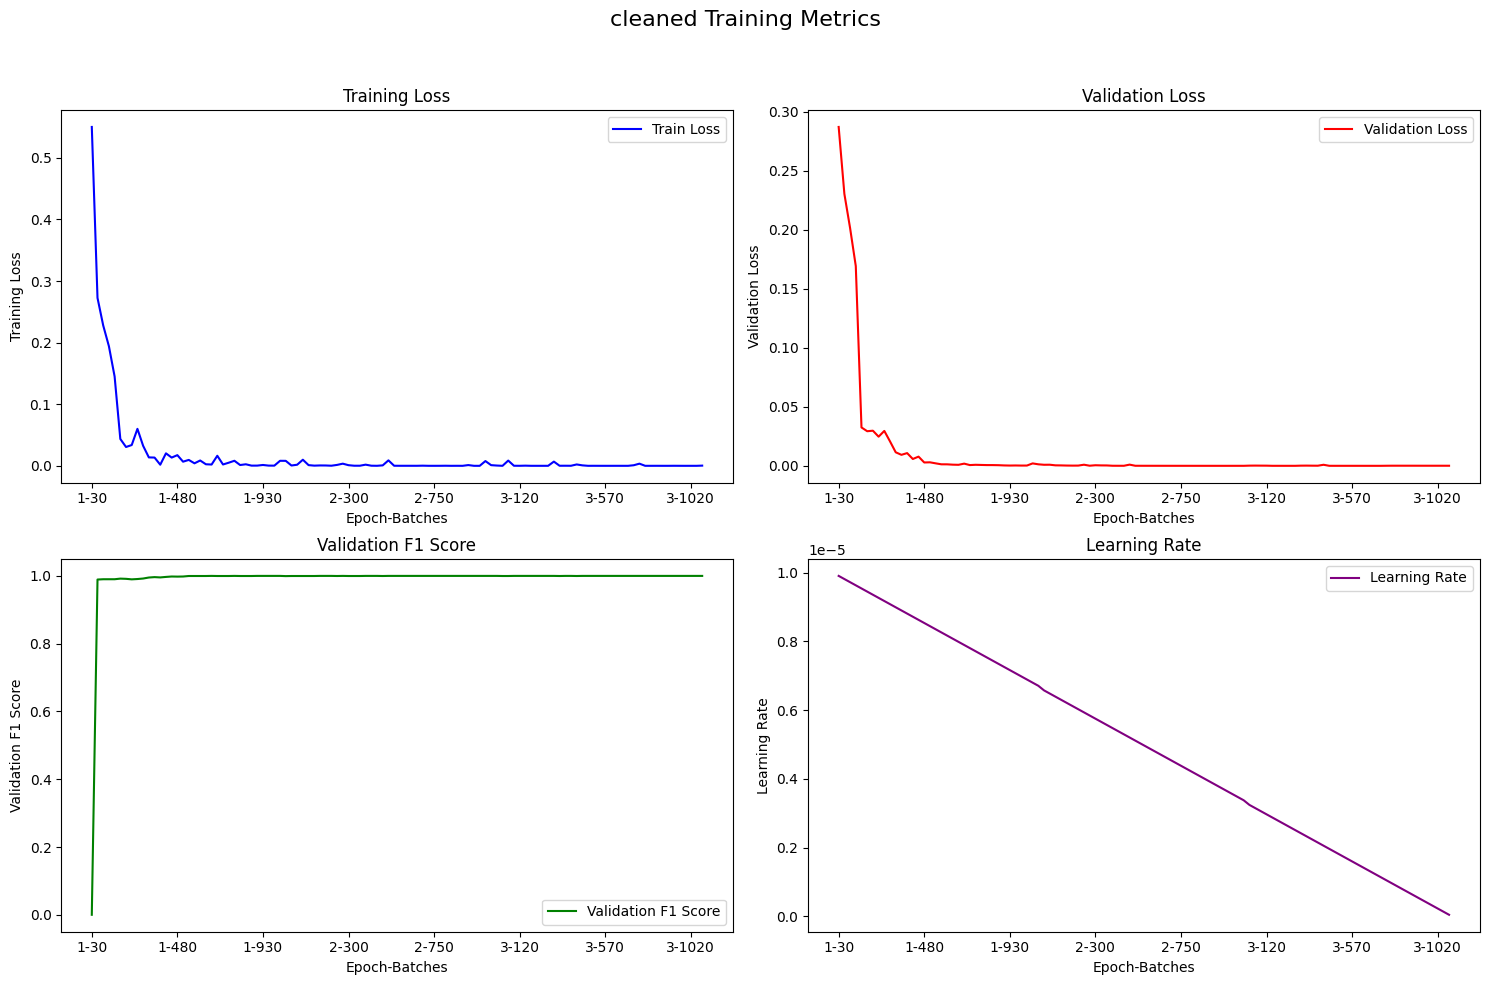

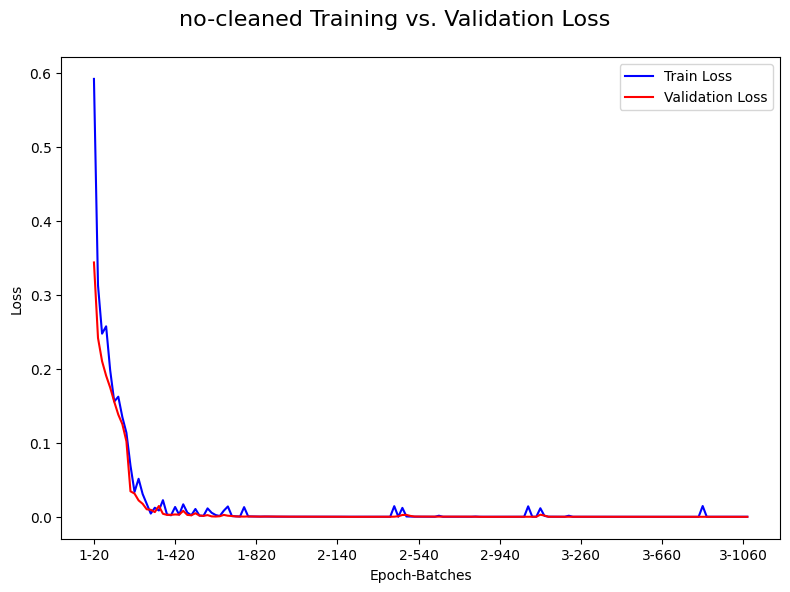

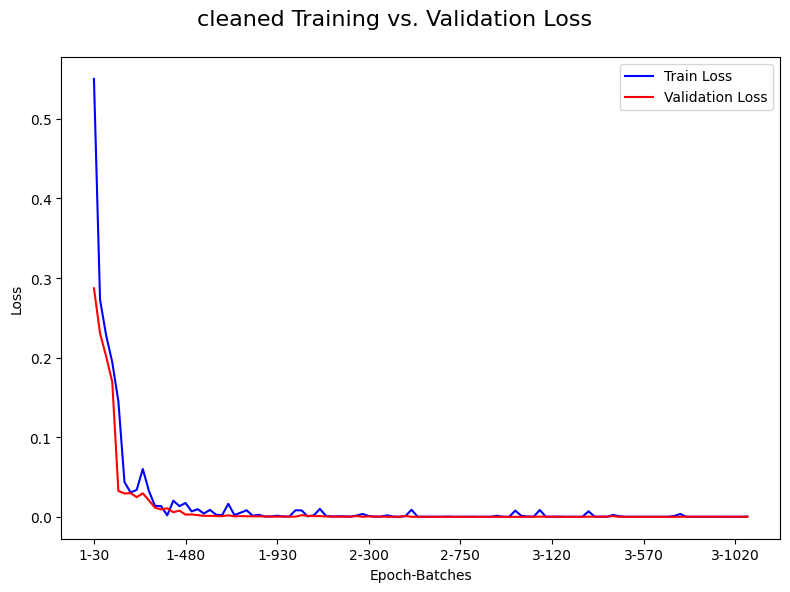

In [5]:
# 3. Function to plot combined training and validation loss
def plot_combined_loss(df, title_prefix=""):
    # Set up the figure
    fig, ax = plt.subplots(figsize=(8, 6))
    fig.suptitle(title_prefix + " Training vs. Validation Loss", fontsize=16)

    # Create an epoch-batch label for x-axis
    epoch_batch = [f"{epoch}-{batch}" for epoch, batch in zip(df['Epoch'], df['Batch'])]

    # Plot Training Loss and Validation Loss
    ax.plot(epoch_batch, df['Train Loss'], label='Train Loss', color='blue')
    ax.plot(epoch_batch, df['Validation Loss'], label='Validation Loss', color='red')
    ax.set_xlabel('Epoch-Batches')
    ax.set_ylabel('Loss')
    ax.legend()

    # Adjust x-axis ticks for better visualization
    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=10, prune='both'))  # Limit number of x-axis ticks

    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()

# 4. Execute the plotting functions
plot_metrics_without_vs(metrics_df, title_prefix="no-cleaned")
plot_metrics_without_vs(training_metrics_detailed_df, title_prefix="cleaned")

plot_combined_loss(metrics_df, title_prefix="no-cleaned")
plot_combined_loss(training_metrics_detailed_df, title_prefix="cleaned")